In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/project data/train.csv')
test=pd.read_csv('/content/drive/MyDrive/project data/test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#dropping cabin because it dosnt contain enough data .
#so , low data canbe cause of lower accuracy or make difficulties to perfectly train the model
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [ ]:
#to check that is there any null value in dataset or not
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [ ]:
#to check that is there any null value in dataset or not
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [ ]:
#filling the missing value
train['Embarked'].fillna('s',inplace=True)

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [ ]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
(177/891)*100

19.865319865319865

In [ ]:
train_age=np.random.randint(
    train['Age'].mean() - train['Age'].std(),
    train['Age'].mean() + train['Age'].std(),
    177,
)


In [ ]:
test_age=np.random.randint(
    test['Age'].mean() - test['Age'].std(),
    test['Age'].mean() + test['Age'].std(),
    86,
)


In [ ]:
train['Age'].isnull().shape

(891,)

In [ ]:
train['Age'][train['Age'].isnull()]=train_age

<ipython-input-151-603ae26aeeb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test['Age'][test['Age'].isnull()]=test_age

<ipython-input-153-abf9310a3d93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train[train['Pclass']==3]['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

In [ ]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
119/(372+119)

0.24236252545824846

In [ ]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [ ]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
s    1.000000
Name: Survived, dtype: float64

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<ipython-input-161-99cf7a3b9057>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==0])
<ipython-input-161-99cf7a3b9057>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'][train['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

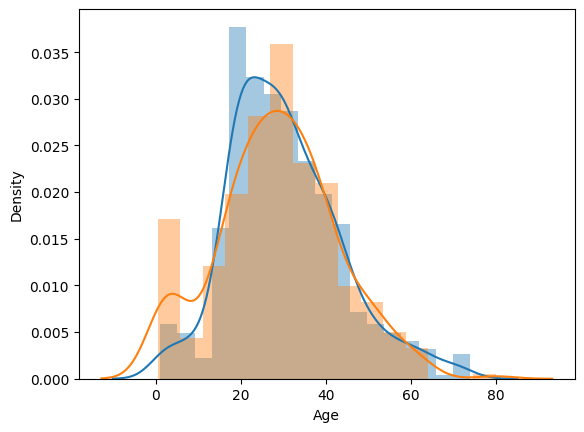

In [ ]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

<ipython-input-162-7ccb192c3cd9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==0])
<ipython-input-162-7ccb192c3cd9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'][train['Survived']==1])


<Axes: xlabel='Fare', ylabel='Density'>

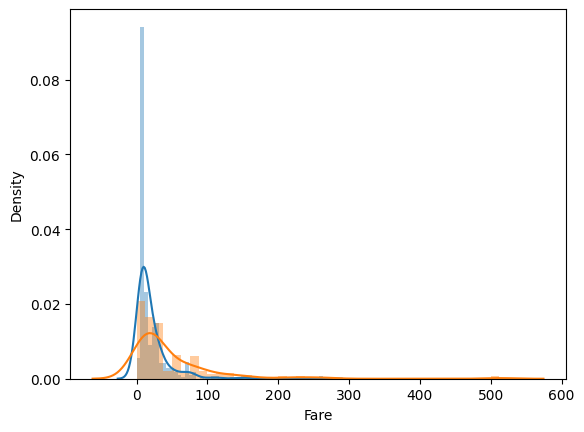

In [ ]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [ ]:
train.groupby(['SibSp'])['Survived'].mean()


SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [ ]:
train.groupby(['Parch'])['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [ ]:
#two columns are defining parents and sibblings colun, tosimlify , we merge it and make a new cloumn
train['family']=train['SibSp']+train['Parch']+1

In [ ]:
#two columns are defining parents and sibblings colun, tosimlify , we merge it and make a new cloumn
test['family']=test['SibSp']+test['Parch']+1

In [ ]:
#it shows how much familys or person travelling with how much members .
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [ ]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [ ]:
def cal(number):
  if number==1:
    return"solo"
  elif number>1 and number<5:
    return"medium"
  else:
    return"large"

In [ ]:
train['family_size']=train['family'].apply(cal)

In [ ]:
test['family_size']=test['family'].apply(cal)

In [ ]:
train.drop(columns=['SibSp','Parch','family'],inplace=True)
test.drop(columns=['SibSp','Parch','family'],inplace=True)


In [ ]:
train.drop(columns=['Name'],inplace=True)
test.drop(columns=['Name'],inplace=True)
#here i drop name because the passenger was survived or not dosnt depend on name

In [ ]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 8)


In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Ticket         0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [ ]:
train.drop(columns=['PassengerId','Ticket'],inplace=True)
test.drop(columns=['PassengerId','Ticket'],inplace=True)
#here i drop name because the passenger was survived or not dosnt depend on id and ticket number

In [ ]:
train.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
family_size    0
dtype: int64

In [ ]:
train.shape

(891, 7)

In [ ]:
train=pd.get_dummies(train,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [ ]:
train.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Embarked_s', 'family_size_medium',
       'family_size_solo'],
      dtype='object')

In [ ]:
test=pd.get_dummies(test,columns=['Pclass','Sex','Embarked','family_size'],drop_first=True)

In [ ]:
test.shape

(418, 9)

In [ ]:
print(test)

      Age      Fare  Pclass_2  Pclass_3  Sex_male  Embarked_Q  Embarked_S  \
0    34.5    7.8292         0         1         1           1           0   
1    47.0    7.0000         0         1         0           0           1   
2    62.0    9.6875         1         0         1           1           0   
3    27.0    8.6625         0         1         1           0           1   
4    22.0   12.2875         0         1         0           0           1   
..    ...       ...       ...       ...       ...         ...         ...   
413  41.0    8.0500         0         1         1           0           1   
414  39.0  108.9000         0         0         0           0           0   
415  38.5    7.2500         0         1         1           0           1   
416  27.0    8.0500         0         1         1           0           1   
417  37.0   22.3583         0         1         1           0           0   

     family_size_medium  family_size_solo  
0                     0        

In [ ]:
print(train)

     Survived   Age     Fare  Pclass_2  Pclass_3  Sex_male  Embarked_Q  \
0           0  22.0   7.2500         0         1         1           0   
1           1  38.0  71.2833         0         0         0           0   
2           1  26.0   7.9250         0         1         0           0   
3           1  35.0  53.1000         0         0         0           0   
4           0  35.0   8.0500         0         1         1           0   
..        ...   ...      ...       ...       ...       ...         ...   
886         0  27.0  13.0000         1         0         1           0   
887         1  19.0  30.0000         0         0         0           0   
888         0  25.0  23.4500         0         1         0           0   
889         1  26.0  30.0000         0         0         1           0   
890         0  32.0   7.7500         0         1         1           1   

     Embarked_S  Embarked_s  family_size_medium  family_size_solo  
0             1           0                

In [ ]:
train.drop(columns=['Embarked_s'],inplace=True)
#here we can see the extra column named embarked_s which holds all null value. thats why were dropping it  to make computation more easy

In [ ]:
print(train)

     Survived   Age     Fare  Pclass_2  Pclass_3  Sex_male  Embarked_Q  \
0           0  22.0   7.2500         0         1         1           0   
1           1  38.0  71.2833         0         0         0           0   
2           1  26.0   7.9250         0         1         0           0   
3           1  35.0  53.1000         0         0         0           0   
4           0  35.0   8.0500         0         1         1           0   
..        ...   ...      ...       ...       ...       ...         ...   
886         0  27.0  13.0000         1         0         1           0   
887         1  19.0  30.0000         0         0         0           0   
888         0  25.0  23.4500         0         1         0           0   
889         1  26.0  30.0000         0         0         1           0   
890         0  32.0   7.7500         0         1         1           1   

     Embarked_S  family_size_medium  family_size_solo  
0             1                   1                 0  

In [ ]:
x=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)


DecisionTreeClassifier()


In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7821229050279329

In [ ]:
xf=test.iloc[:,:].values

In [ ]:
test=test
test

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_size_medium,family_size_solo
0,34.5,7.8292,0,1,1,1,0,0,1
1,47.0,7.0000,0,1,0,0,1,1,0
2,62.0,9.6875,1,0,1,1,0,0,1
3,27.0,8.6625,0,1,1,0,1,0,1
4,22.0,12.2875,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
413,41.0,8.0500,0,1,1,0,1,0,1
414,39.0,108.9000,0,0,0,0,0,0,1
415,38.5,7.2500,0,1,1,0,1,0,1
416,27.0,8.0500,0,1,1,0,1,0,1


In [ ]:
y_pred = classifier.predict(test)

row_to_predict =test.iloc[416]  # Select the first row

prediction = classifier.predict([row_to_predict])

# Map the prediction to 'Survived' (1) or 'Not Survived' (0)
predicted_survival = 'Survived' if prediction[0] == 1 else 'Not Survived'

print(f"Predicted Survival for Passenger: {predicted_survival}")


Predicted Survival for Passenger: Not Survived


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
